In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Veri setinin genel yapısını inceleyelim
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


There are a total of 8,807 entries (TV shows or movies) in our dataset, which is sufficient for analysis and visualization purposes. When we examine the `dtype` section, we see that the **`release_year`** column is of numeric type (int64), while the remaining columns are of textual type (object).Looking at the **Non-Null Count**, we can observe that some columns contain missing values.

Let’s examine this in more detail:

## Detecting Missing Values

In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Based on the output above:
- There is a significant amount of missing data in the `director`, `cast` and `country` columns 
- Additionally, a few missing values are present in the `date_added`, `rating` and `duration` columns as well.

**These columns can either be cleaned or excluded from specific analyses depending on the context.
Special attention should be given to columns like `director`, where the proportion of missing data is considerably high.**

***The missing values in the dataset are below 30% and are all in categorical (string) format.***

---

Therefore, we aim to preserve data integrity by assigning appropriate and meaningful placeholder values to the missing entries:


## Filling in Missing Values


- Missing values in the `director`, `cast` and `country` columns will be filled with the placeholder `"Unknown"`
- Missing values in the `rating` column will be filled with `"Not Rated"`
- Missing values in the`duration` column will also be filled with `"Unknown"`

The missing values in the `date_added` columns will be left as they are for now and will be converted to datetime format later. In this case, the missing entries will remain as **`NaT`** (Not a Time)

In [5]:
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['duration'] = df['duration'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Not Rated")

In [6]:
df['director'].value_counts().reset_index().rename(columns={'index': 'director', 'director': 'count'})


,count,count
0,Unknown,2634
1,Rajiv Chilaka,19
2,"Raúl Campos, Jan Suter",18
3,Suhas Kadav,16
4,Marcus Raboy,16
...,...,...
4524,"Raymie Muzquiz, Stu Livingston",1
4525,Joe Menendez,1
4526,Eric Bross,1
4527,Will Eisenberg,1


In [7]:
df['cast'].value_counts().reset_index().rename(columns={'index': 'cast', 'cast': 'count'})


,count,count
0,Unknown,825
1,David Attenborough,19
2,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",14
3,Samuel West,10
4,Jeff Dunham,7
...,...,...
7688,"Nick Lachey, Vanessa Lachey",1
7689,"Takeru Sato, Kasumi Arimura, Haru, Kentaro Sak...",1
7690,"Toyin Abraham, Sambasa Nzeribe, Chioma Chukwuk...",1
7691,"Neeraj Kabi, Geetanjali Kulkarni, Danish Husai...",1


In [8]:
df['country'].value_counts().reset_index().rename(columns={'index': 'country', 'country': 'count'})


,count,count
0,United States,2818
1,India,972
2,Unknown,831
3,United Kingdom,419
4,Japan,245
...,...,...
744,"Romania, Bulgaria, Hungary",1
745,"Uruguay, Guatemala",1
746,"France, Senegal, Belgium",1
747,"Mexico, United States, Spain, Colombia",1


In [9]:
df['rating'].value_counts().reset_index().rename(columns={'index': 'rating', 'rating': 'count'})


,count,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


##  Increase in  `NaT` Values in the `date_added` Column and Attempted Fix

Initially, there were only 10 missing values (NaN) in the `date_added` column of the dataset. However, when the column was converted to datetime format using the following line:

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

Some values with invalid formatting could not be recognized as proper dates and were therefore converted to `NaT (Not a Time)`.
As a result, the number of missing values **increased from 10 to 98.**
This increase occurred because some date values, although they appeared correct visually, contained **extra spaces, missing commas, or hidden characters**. For example:
  
    " September 25, 2021 "
Such entries could not be parsed properly by pandas.
To resolve this issue, all date values were cleaned using the `.str.strip()` method before conversion to remove unnecessary spaces:

In [10]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [11]:
# NaT verilerinin olduğu satırlara bakalım
df[df['date_added'].isna()][['title', 'date_added']]

,title,date_added
6066,A Young Doctor's Notebook and Other Stories,NaT
6174,Anthony Bourdain: Parts Unknown,NaT
6795,Frasier,NaT
6806,Friends,NaT
6901,Gunslinger Girl,NaT
7196,Kikoriki,NaT
7254,La Familia P. Luche,NaT
7406,Maron,NaT
7847,Red vs. Blue,NaT
8182,The Adventures of Figaro Pho,NaT


In [12]:
# İlk 5 satıra göz atalım 
df[['title', 'date_added']].head()

,title,date_added
0,Dick Johnson Is Dead,2021-09-25
1,Blood & Water,2021-09-24
2,Ganglands,2021-09-24
3,Jailbirds New Orleans,2021-09-24
4,Kota Factory,2021-09-24


## 🔍 Exploring the Data (EDA)

### **1️.  Distribution of Content Types**


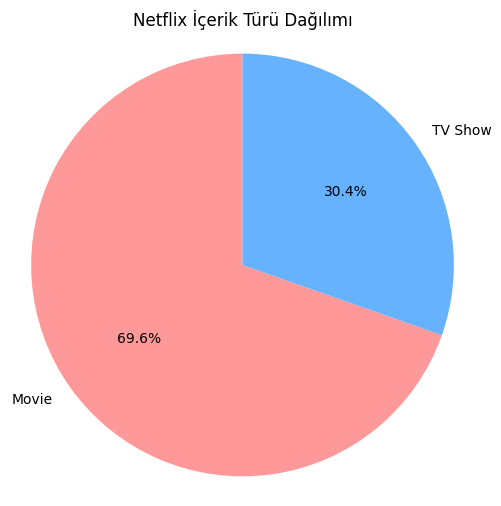

In [13]:
import matplotlib.pyplot as plt
type_counts = df["type"].value_counts()
plt.figure(figsize =(6,6))
plt.pie(type_counts, labels = type_counts.index, autopct = "%1.1f%%", colors = ['#FF9999', '#66B2FF'], startangle= 90)
plt.title("Netflix İçerik Türü Dağılımı")
plt.axis("equal")
plt.show()

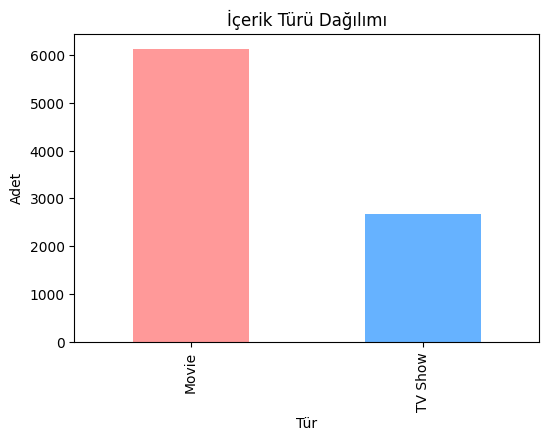

In [14]:
df['type'].value_counts().plot(kind='bar', color=['#FF9999', '#66B2FF'], title='İçerik Türü Dağılımı', ylabel='Adet', xlabel='Tür', figsize=(6,4))
plt.show()

According to the Netflix dataset, **approximately 70% of the content consists of movies**, while the remaining **30% falls under the category of TV shows**.
- The bar chart provides a clear comparison in terms of quantity.
- The pie chart helps visualize the proportional distribution.

A closer look reveals that there are **over 6,000 movies** and **nearly 3,000 TV shows** in the dataset.

This analysis indicates that **Netflix predominantly focuses on movie content.**

### **2️. Number of Titles Added by Year**
 
This analysis shows the years in which content was added to the Netflix platform. By extracting the year information from the `date_added` column, the distribution of content over the years was examined. 

This allows us to visualize **how Netflix's content volume has grown over time.**

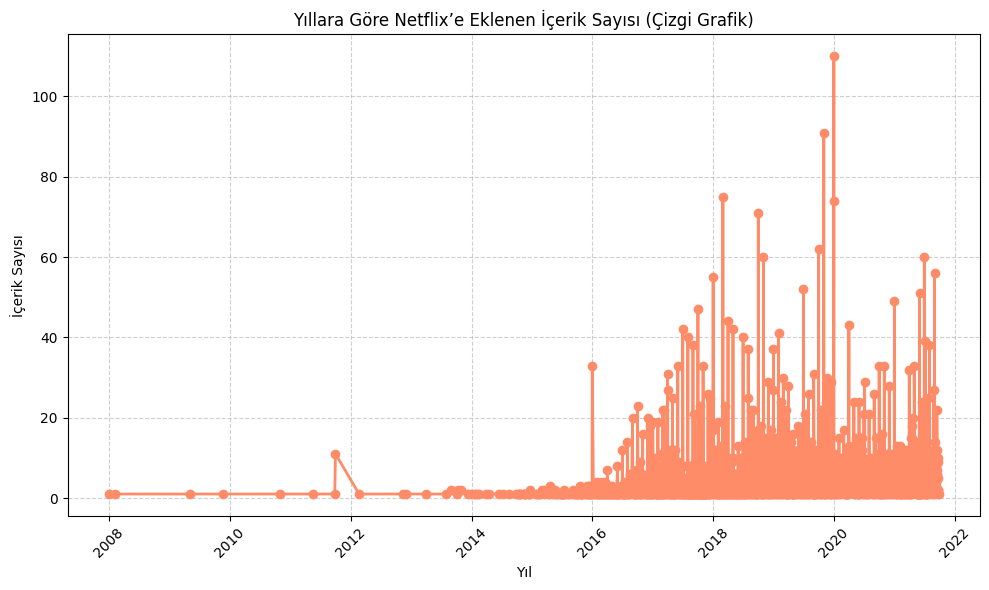

In [15]:
# Yıllara göre içerik sayısı
year_counts = df["date_added"].value_counts().sort_index()

# Çizgi grafik çizimi
plt.figure(figsize=(10,6))
plt.plot(year_counts.index, year_counts.values, color='#FF8C69', marker='o', linewidth=2)

plt.title('Yıllara Göre Netflix’e Eklenen İçerik Sayısı (Çizgi Grafik)')
plt.xlabel('Yıl')
plt.ylabel('İçerik Sayısı')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As seen in the chart:
- **Before 2016**, the number of titles added to the platform was quite low.
- **Starting from 2016**, there was a noticeable increase in the number of additions.
- **In 2018 and 2019**, the number of titles added reached its peak.
- **In 2020 and 2021**, there was a slight decline, but the numbers still remained relatively high.
- This trend reflects **Netflix’s global expansion strategy** and its growing focus on **original content** production after 2016.

### **3️. Distribution of Movies and TV Shows by Year**
In this analysis, the yearly distribution of content types (Movies and TV Shows) is examined. By combining the `type` column with the year extracted from the `date_added` column, the number of movies and TV shows added each year was visualized.

This analysis helps us understand which type of content Netflix has focused on over time as part of its content strategy.

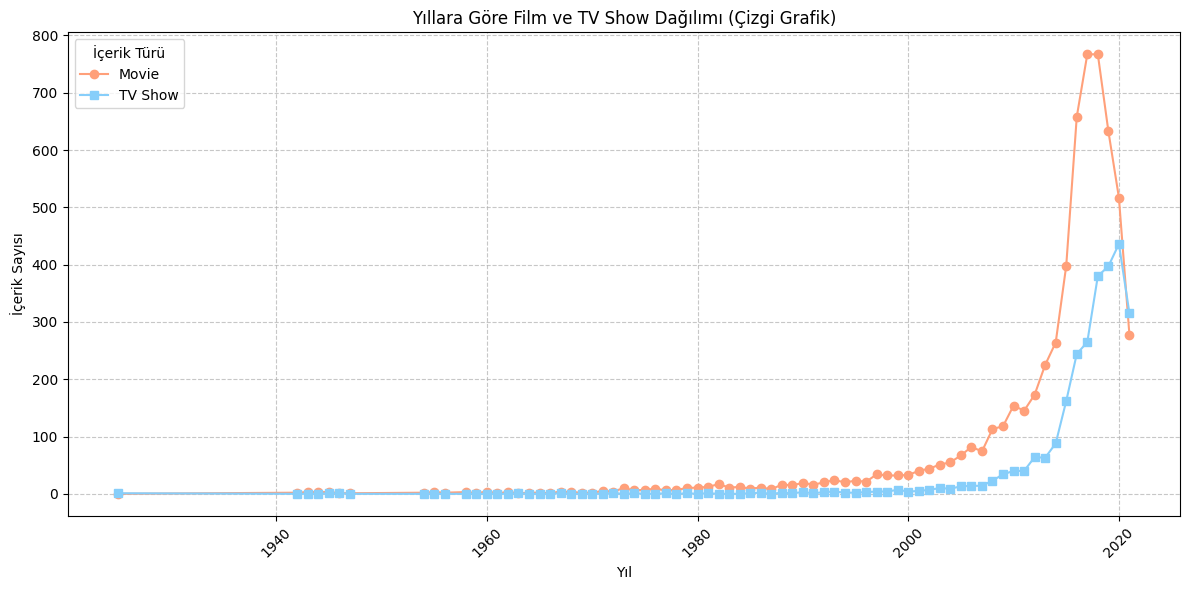

In [16]:
# 'release_year' ve 'type' üzerinden içerik sayısını gruplayalım
grouped = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Çizgi grafik
plt.figure(figsize=(12,6))
plt.plot(grouped.index, grouped['Movie'], marker='o', label='Movie', color='#FFA07A')
plt.plot(grouped.index, grouped['TV Show'], marker='s', label='TV Show', color='#87CEFA')

plt.title('Yıllara Göre Film ve TV Show Dağılımı (Çizgi Grafik)')
plt.xlabel('Yıl')
plt.ylabel('İçerik Sayısı')
plt.legend(title='İçerik Türü')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Key observations from the chart:

- **Before 2016**, the number of both content types was relatively low.
- **Starting from 2016**, there was a significant increase in the number of both Movies and TV Shows.
- **2018 and 2019** were the peak years for content growth, with a particularly noticeable increase in Movies.
- **TV Shows** also increased over time but consistently remained lower in number compared to Movies.


This chart shows that **Netflix primarily focused on adding movies**, but over time, it also started to give more space to TV series.

### **4. Distribution of Content by Country**
In this analysis, the distribution of Netflix content based on the country of origin is examined. Using the `country` olumn, the number of titles from each country was calculated, and the top 10 countries with the most content were visualized.

Since some titles may be associated with multiple countries, only the first listed country was taken into account for counting purposes.


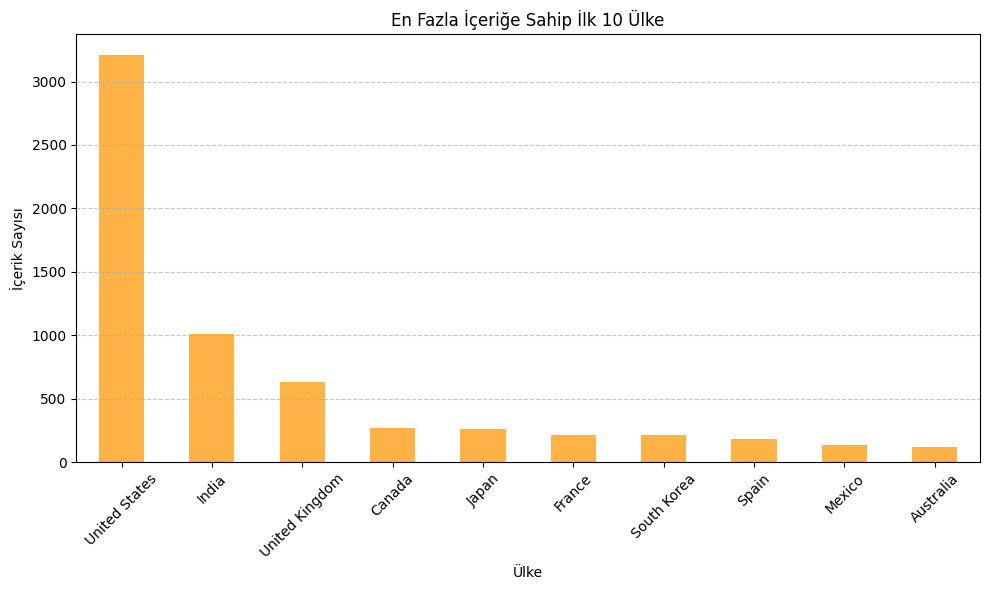

In [17]:
# Eksik değerleri temizle (zaten Unknown ile doldurmuştuk ama kontrol edelim)
df_country = df[df['country'] != 'Unknown'].copy()

# Birden fazla ülke varsa ilkini alalım
df_country['main_country'] = df_country['country'].apply(lambda x: x.split(',')[0].strip())

# Ülke sayılarını say ve ilk 10’u seç
top_countries = df_country['main_country'].value_counts().head(10)

# Grafik çizimi
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='#FFB347')
plt.title('En Fazla İçeriğe Sahip İlk 10 Ülke')
plt.xlabel('Ülke')
plt.ylabel('İçerik Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The chart shows the top 10 countries with the highest number of titles on Netflix:

- **The United States** hosts a significant portion of the content available on the platform.
- **India and the United Kingdom** follow the U.S. as countries contributing the most content.
- **Several countries from Asia and Europe** are also included in the list, reflecting Netflix's strategy to diversify its global content library.

This analysis indicates that while **Netflix’s content sources are largely centered in the United States**, the platform also includes a wide range of titles from around the world.

### **5. Distribution of Content Ratings**
In this analysis, the distribution of Netflix content by age/rating categories is examined. Using the `rating` column, the target audience for each piece of content was identified.

This helps us gain insights into Netflix’s audience targeting strategy.

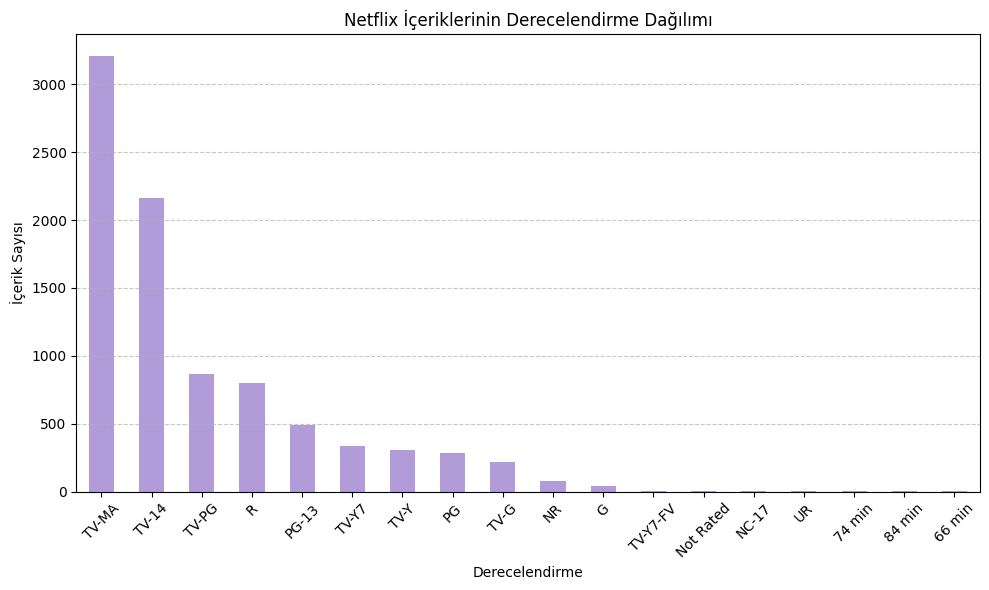

In [18]:
# Rating sütununa göre gruplama
rating_counts = df['rating'].value_counts().sort_values(ascending=False)

# Grafik çizimi
plt.figure(figsize=(10,6))
rating_counts.plot(kind='bar', color='#B19CD9')
plt.title('Netflix İçeriklerinin Derecelendirme Dağılımı')
plt.xlabel('Derecelendirme')
plt.ylabel('İçerik Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Cleaning Incorrect Rating Values

Some values that do not belong in the `rating` olumn were identified in the dataset. For example, entries such as `84 min`, `66 min` and `74 min` present durations and should actually be found in the `duration` column — however, they were **mistakenly placed in the rating field.**

Since these incorrect entries could affect the accuracy of the analysis, they were **filtered out and removed from the dataset**:

In [19]:
df_clean = df[~df['rating'].isin(['84 min', '66 min', '74 min'])]

These values were identified as belonging to the `duration` column but were mistakenly added to the `rating` column.

Therefore, to ensure a more accurate analysis, these values were removed from the dataset, and the chart was recreated accordingly.

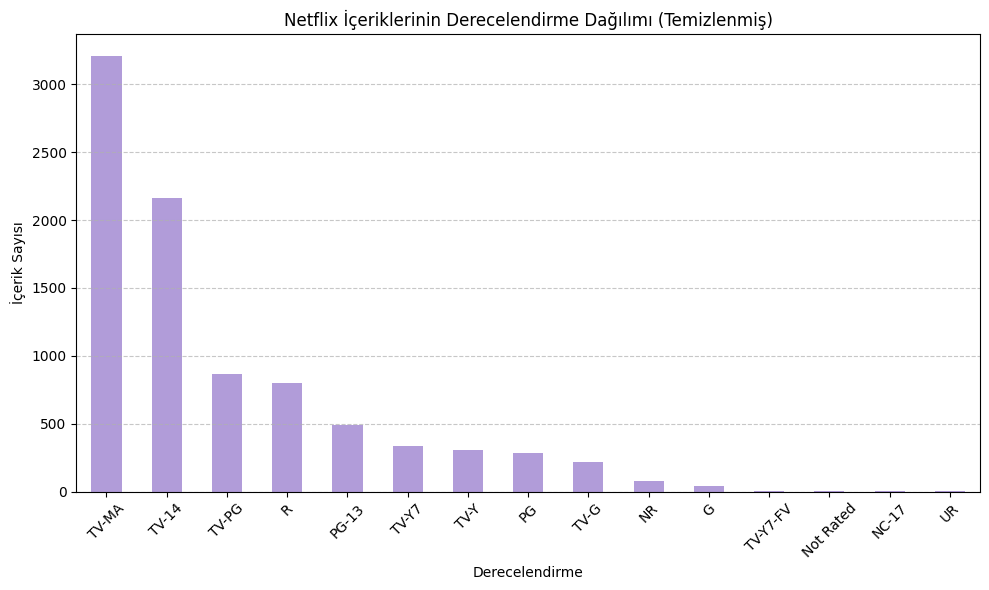

In [20]:
# Derecelendirme sayılarını al
rating_counts_clean = df_clean['rating'].value_counts().sort_values(ascending=False)

# Grafik çizimi
plt.figure(figsize=(10,6))
rating_counts_clean.plot(kind='bar', color='#B19CD9')
plt.title('Netflix İçeriklerinin Derecelendirme Dağılımı (Temizlenmiş)')
plt.xlabel('Derecelendirme')
plt.ylabel('İçerik Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### About Rating Labels

Netflix content is classified by age group using the `rating` column. 
This classification helps us understand which target audience the content is intended for.

| `rating`                  | Description                                                              | 	Target Audience       |
|---------------------------|--------------------------------------------------------------------------|--------------------|
| `TV-MA`                   | Suitable only for adults. Not appropriate for viewers under 17.          | Adults (18+)     |
| `TV-14`                   | May be inappropriate for children under 14.                              | Teens  (14+)        |
| `TV-PG`                   | Parental guidance suggested. Some scenes may not be suitable for children. | General/Family (10+)   |
| `PG-13`                   | 	Parents strongly cautioned for children under 13.                           | Teens  (13+)        |
| `R`                       | Restricted. Intended for adults only (under 17 requires adult guidance).               | Adults (17+)     |
| `G`                       | 	Suitable for all ages.                                                 | Children              |
| `TV-Y`                    | Suitable for young children.                                         | Children (0-6 yrs)    |
| `TV-Y7`                   | Suitable for children age 7 and older.                                 | Children (7+)         |

---

Findings from the chart:

- **The TV-MA** category (for ages 17 and up) has the highest number of titles. This indicates that Netflix primarily focuses on content for an adult audience.
- Categories like **TV-14** and **TV-PG**, which target broader age groups, are also significantly represented.
- Content aimed at children, such as **G**, **PG**, and **TV-Y**, is relatively less common.

This analysis reveals that Netflix mainly offers content **targeted toward teens and adults.**

### **6. Distribution of Content Categories (Genres)**
In this analysis, the genres of the content — found in the `listed_in` column — were examined.
Since many titles belong to multiple categories, all genres were separated and the most frequently occurring types were identified.

This allows us to visualize **which genres are most commonly offered on Netflix**.

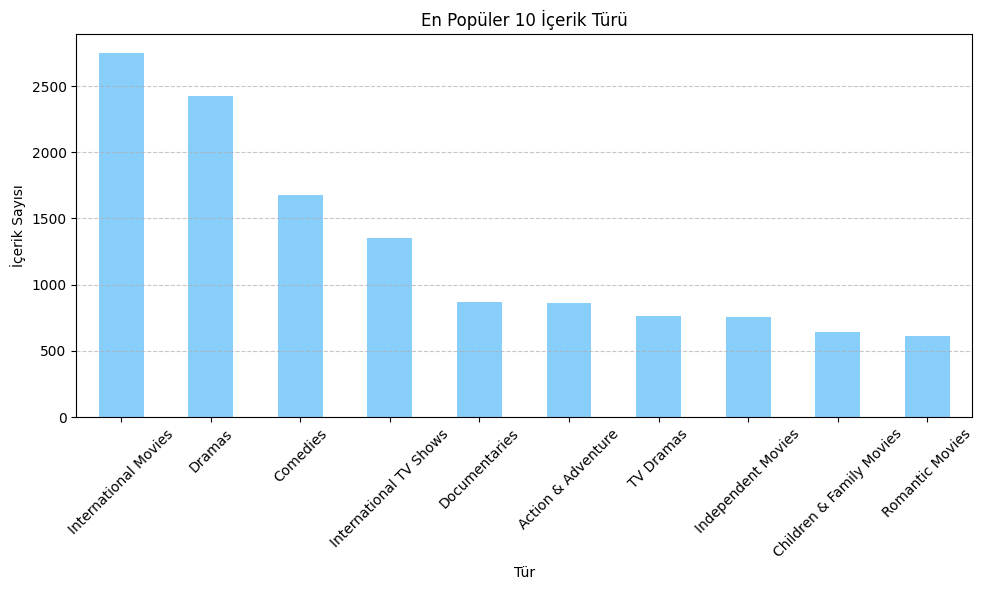

In [21]:
from collections import Counter
import matplotlib.pyplot as plt

# listed_in sütunundaki tüm türleri virgüle göre ayır
genres_series = df['listed_in'].dropna().str.split(', ')

# Tüm türleri birleştir
all_genres = [genre for sublist in genres_series for genre in sublist]

# En sık geçen 10 türü say
genre_counts = pd.Series(Counter(all_genres)).sort_values(ascending=False).head(10)

# Grafik çiz
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar', color='#87CEFA')
plt.title('En Popüler 10 İçerik Türü')
plt.xlabel('Tür')
plt.ylabel('İçerik Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Observations from the chart:

- **International Movies** and **Dramas** are by far the most common genres on the platform.
-  **Comedies** and **Documentaries** also hold a significant share.
- The prominence of genres labeled "International" reflects **Netflix’s global content strategy**.  

This analysis is particularly useful for understanding *content planning based on user preferences*.

### **7. Relationship Between Rating and Content Type**
In this analysis, the relationship between the `rating` and `type` columns is examined. 
The goal is to determine whether content targeted at specific age groups is more commonly presented as a movie or a TV show.


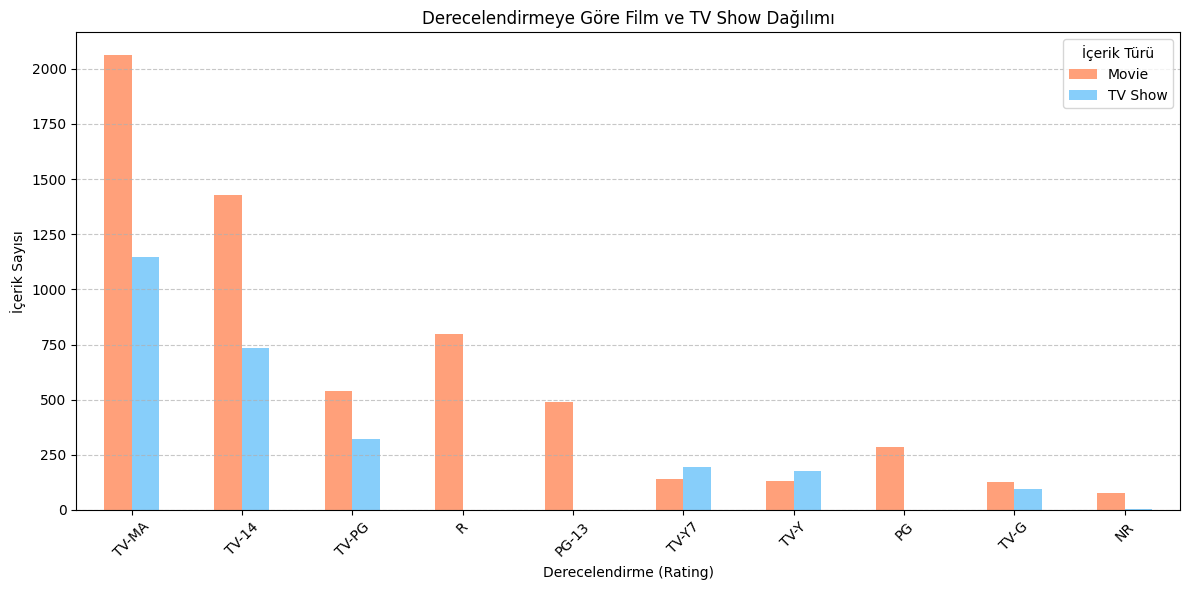

In [22]:
# Rating ve Type'a göre gruplama
rating_type_counts = df_clean.groupby(['rating', 'type']).size().unstack(fill_value=0)

# En çok kullanılan ilk 10 rating’i al
top_ratings = df_clean['rating'].value_counts().head(10).index
rating_type_counts = rating_type_counts.loc[top_ratings]

# Grafik
rating_type_counts.plot(kind='bar', figsize=(12,6), color=['#FFA07A', '#87CEFA'])
plt.title('Derecelendirmeye Göre Film ve TV Show Dağılımı')
plt.xlabel('Derecelendirme (Rating)')
plt.ylabel('İçerik Sayısı')
plt.legend(title='İçerik Türü')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Key insights from the chart:

- **TV-MA** and **TV-14** are the most common ratings across both movies and TV shows. This suggests that Netflix largely targets a **young adult and adult audience**.

- **Ratings like R and PG-13**, which originate from cinema standards, are used almost exclusively for movies.
This indicates that films often contain **more mature themes, stronger language, or violence**.

- **TV-Y, TV-Y7**, and **TV-G**, which are suitable for children, appear more frequently in the TV show format.
This suggests that educational and entertaining content is often preferred in series format.

- **Ratings such as NR (Not Rated)** and **TV-G** are seen only in certain content types,
implying that some productions might not yet be officially rated or are produced for specific regional markets.

This analysis helps us understand **which content formats are more commonly used for different age groups** and offers insight into **Netflix’s rating-based content strategy**.

### **8.  Distribution of Content Types by Country**

In this analysis, the relationship between the country of origin (`country`) and the type of content (`type`)  is examined. It visualizes whether the top 10 content-producing countries focus more on movies or TV shows.

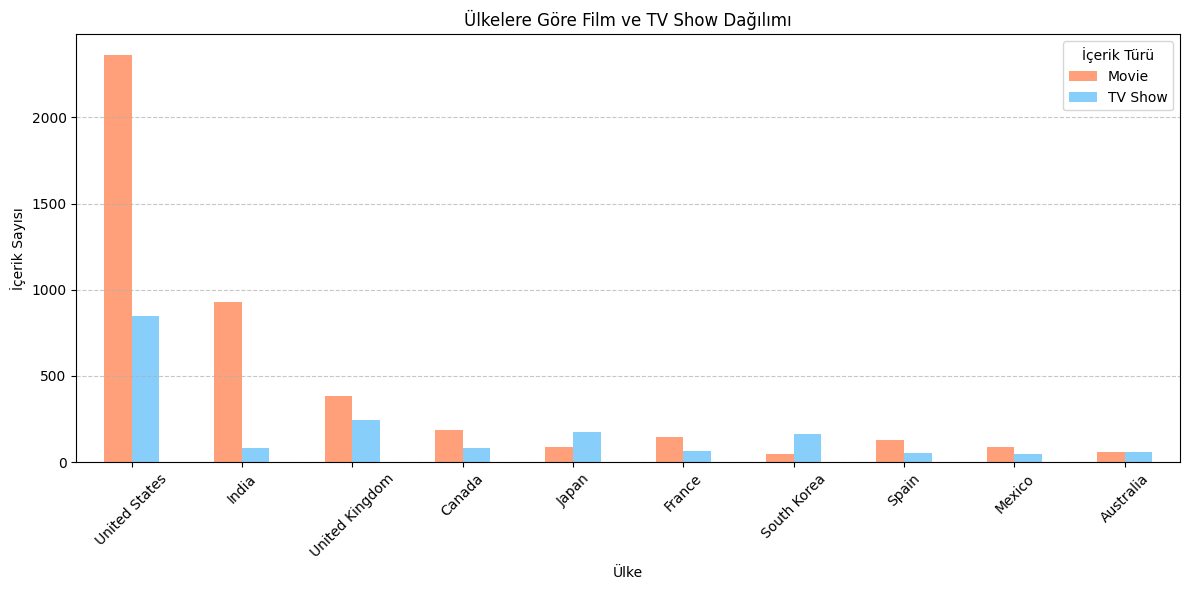

In [23]:
# country sütununu ilk ülke ile sadeleştir
df_country = df[df['country'] != 'Unknown'].copy()
df_country['main_country'] = df_country['country'].apply(lambda x: x.split(',')[0].strip())

# Gruplama: Ülke ve içerik türüne göre say
country_type = df_country.groupby(['main_country', 'type']).size().unstack(fill_value=0)

# En çok içerik üreten ilk 10 ülkeyi al
top_countries = df_country['main_country'].value_counts().head(10).index
country_type = country_type.loc[top_countries]

# Grafik
country_type.plot(kind='bar', figsize=(12,6), color=['#FFA07A', '#87CEFA'])
plt.title('Ülkelere Göre Film ve TV Show Dağılımı')
plt.xlabel('Ülke')
plt.ylabel('İçerik Sayısı')
plt.legend(title='İçerik Türü')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Observations from the chart:
- **The United States** is by far the leader in producing both movies and TV shows.
- **India** is heavily focused on movie production, with relatively fewer TV shows.
- In countries like **Japan, South Korea, and France**, the number of TV shows has equaled or even surpassed that of movies.
- **In Australia, Mexico, and Spain**, the distribution between movies and TV shows is more balanced.

While the U.S. shows a high diversity in content, countries like India concentrate mainly on film production.
**Asian countries stand out particularly for their high volume of TV show production**.These findings provide valuable insights into the content strategies of different countries.

### **9.  Most Popular Content Genres by Country (Category-Based Distribution)**
In this analysis, the most frequently produced content genres (`listed_in`) by the top 10 countries are examined. 
Since a single title can belong to multiple genres, the data was exploded using the `explode()` function to perform an accurate analysis.


####  Exploding Data with the `explode()` Function
In the dataset, the `listed_in` (content category) column may contain multiple genres for a single title.
For example:   
- "International Movies, Dramas"  
- "Comedies, Romantic Movies"

In such cases, each genre must be analyzed individually to ensure accuracy.

This is where the  **`explode()` function** comes into play.

Purpose of Using: 
- When a single title belongs to multiple genres, explode helps **split each genre into a separate row** for analysis.
- This allows us to **accurately calculate the frequency** of each genre.
- Grouping, counting, and visualizing by genre becomes **more meaningful and precise**.

#### 🔍 Example Transformation:
Before:

| title     | listed_in                   |
|-----------|-----------------------------|
| Movie A   | Action, Dramas              |
| Movie B   | Comedies, Romantic Movies   |

After `explode()`:

| title     | listed_in         |
|-----------|-------------------|
| Movie A   | Action            |
| Movie A   | Dramas            |
| Movie B   | Comedies          |
| Movie B   | Romantic Movies   |

This approach enriches the analysis by turning each genre into an individual row, making calculations more accurate and insightful.

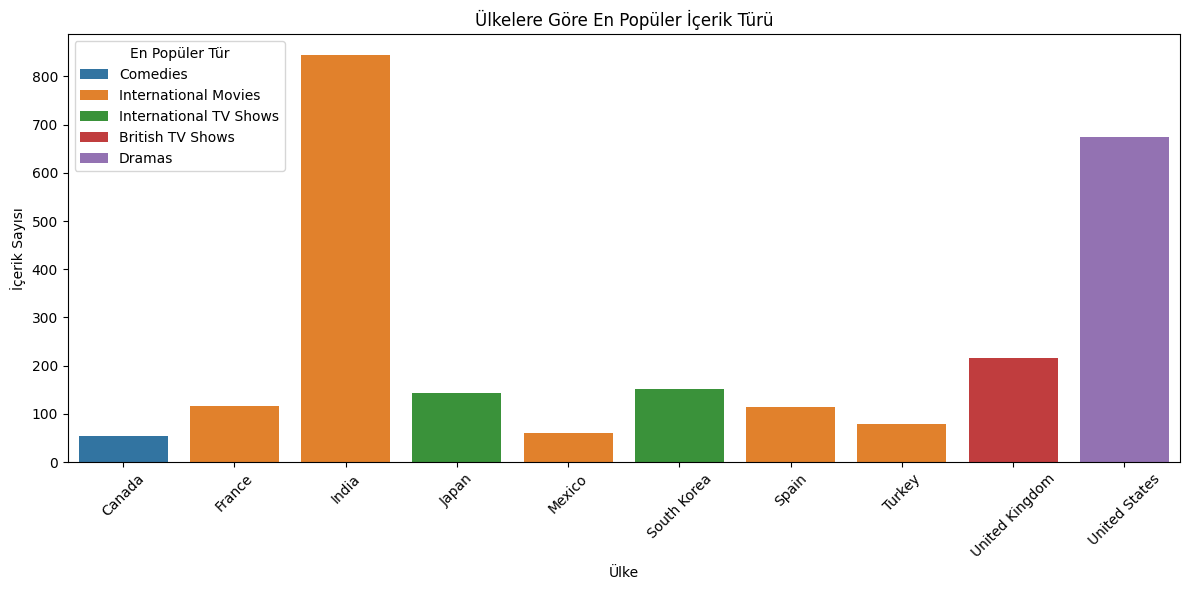

In [24]:
# 'country' kolonundan sadece ilk ülkeyi alalım
df_genres = df[df['country'] != 'Unknown'].copy()
df_genres['main_country'] = df_genres['country'].apply(lambda x: x.split(',')[0].strip())

# İçerik türleri virgülle ayrıldığı için her satırı türlerine ayıralım
df_exploded = df_genres.copy()
df_exploded['listed_in'] = df_exploded['listed_in'].str.split(', ')
df_exploded = df_exploded.explode('listed_in')

# Grup: ülke ve kategori bazlı sayım
country_genre = df_exploded.groupby(['main_country', 'listed_in']).size().reset_index(name='count')

# Her ülkenin en çok ürettiği kategoriyi bul
top_genres = country_genre.loc[country_genre.groupby('main_country')['count'].idxmax()]

# En fazla içerik üreten 10 ülkeye odaklan
top10 = df_exploded['main_country'].value_counts().head(10).index
top_genres_top10 = top_genres[top_genres['main_country'].isin(top10)]

# Grafik çiz
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(data=top_genres_top10, x='main_country', y='count', hue='listed_in', dodge=False)
plt.title('Ülkelere Göre En Popüler İçerik Türü')
plt.xlabel('Ülke')
plt.ylabel('İçerik Sayısı')
plt.legend(title='En Popüler Tür')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observations from the chart:
- In **India**, the most popular genre by far is **International Movies**.
- In **the United States**, **Dramas** are the most frequently produced genre.
- For **the United Kingdom**, the standout category is **British TV Shows**.
- **In South Korea and Japan**, **International TV Shows** dominate.
- **In Canada**, **Comedies** are the most preferred genre.

This chart clearly demonstrates how *Netflix's content strategies and user preferences vary across countries*.
For example, while *dramatic content dominates in the U.S., international films are more prominent in India*.
These differences may reflect *each country’s cultural and social consumption habits*.

### **10. Duration Analysis of Netflix Content**
In this analysis, the duration information of the content was examined.
In the dataset, this column varies depending on the type of content:
- For Movies, the duration is expressed in minutes (e.g., `"90 min"`, `"120 min"`).
- For TV Shows, the duration is expressed in number of seasons (e.g., `"1 Season"`, `"2 Seasons"`).

Before conducting the analysis, these values were extracted as numerical data and stored in a new column called `duration_int`.

In [25]:
# Örnek değerleri görelim
df[['type', 'duration']].drop_duplicates().sample(10)

,type,duration
91,Movie,92 min
26,Movie,147 min
41,Movie,124 min
0,Movie,90 min
1507,Movie,28 min
350,Movie,130 min
1132,Movie,185 min
262,Movie,78 min
4253,Movie,312 min
134,Movie,142 min


In [26]:
# Filmler
movies = df[df['type'] == 'Movie'].copy()
movies['duration_int'] = movies['duration'].str.extract('(\d+)').astype(float)

# Diziler
shows = df[df['type'] == 'TV Show'].copy()
shows['duration_int'] = shows['duration'].str.extract('(\d+)').astype(float)

Burada sadece sayısal değeri aldık (dakika/sezon sayısı).

#### **10.1 Filmlerin Süre Dağılımı**

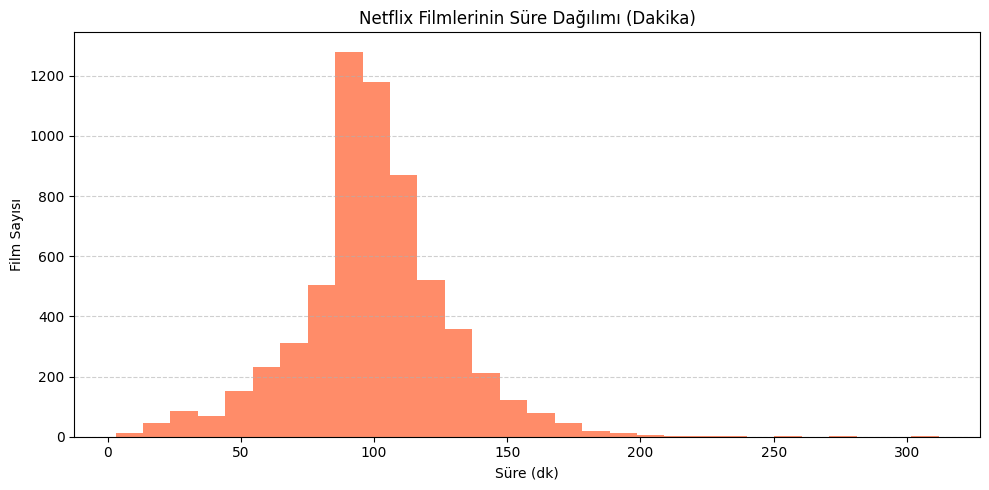

In [27]:
plt.figure(figsize=(10,5))
movies['duration_int'].plot(kind='hist', bins=30, color='#FF8C69')
plt.title('Netflix Filmlerinin Süre Dağılımı (Dakika)')
plt.xlabel('Süre (dk)')
plt.ylabel('Film Sayısı')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The `duration` column was filtered to include only content labeled as **"Movie"**, and the duration values were extracted numerically in minutes.

Observations from the chart:
- Most movies have a duration **between 80 and 110 minutes**.
- The most common range is **90 to 100 minutes**.
- Movies longer than **200 minutes** are quite rare.
- There are also relatively **few movies shorter than 50 minutes**.

These findings suggest that ***Netflix’s content strategy aligns with viewer preferences for medium-length films***.   

#### **10.2 Distribution of TV Show Seasons**

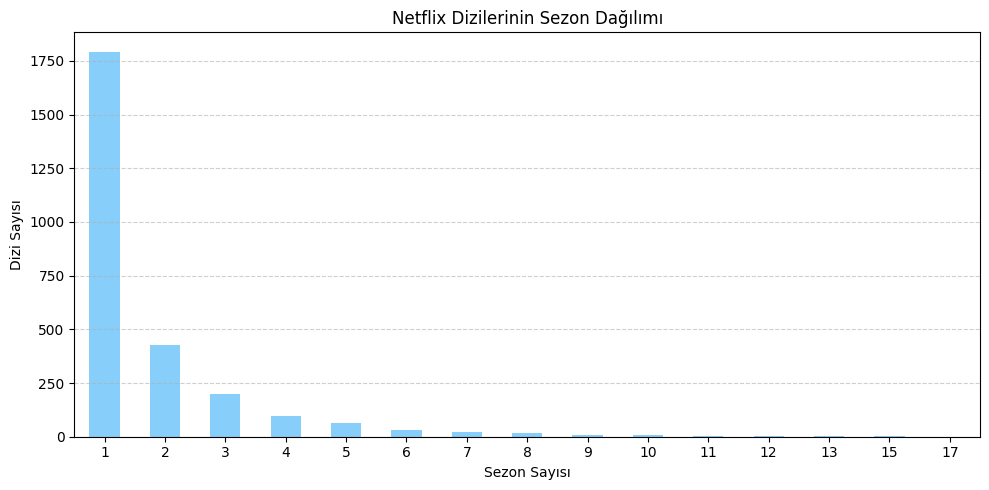

In [28]:
plt.figure(figsize=(10,5))
shows['duration_int'].value_counts().sort_index().plot(kind='bar', color='#87CEFA')
plt.title('Netflix Dizilerinin Sezon Dağılımı')
plt.xlabel('Sezon Sayısı')
plt.ylabel('Dizi Sayısı')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Sezon sayısını tam sayı olarak göster
plt.xticks(
    ticks=range(len(shows['duration_int'].value_counts().sort_index())),
    labels=shows['duration_int'].value_counts().sort_index().index.astype(int),
    rotation=0
)

plt.tight_layout()
plt.show()


**When examining the distribution of TV shows by the number of seasons, it is clear that single-season shows are by far the most common.**
This suggests that Netflix places a strong emphasis **on mini-series, documentary series, or limited-run content**.

TV shows with **2 or 3 seasons** also form noticeable groups.
However, as the number of seasons increases, the number of shows decreases significantly.

TV shows with **more than 10 seasons** are extremely rare.

Overall, this distribution may reflect Netflix's tendency to focus on short, easily consumable content.
It also suggests that users may **prefer series they can finish in a short amount of time**.

#### **10.3 Comparison of Average Movie Duration and TV Show Seasons**
In this analysis, the average movie duration (in minutes) and the average number of TV show seasons on Netflix were calculated.
The `duration` column was processed to extract only numeric values, and the analysis was conducted by content type.

In [29]:
# Ortalama süre (Movie)
average_movie_duration = movies['duration_int'].mean()

# Ortalama sezon (TV Show)
average_show_season = shows['duration_int'].mean()

print(f"🎬 Ortalama film süresi: {average_movie_duration:.1f} dakika")
print(f"📺 Ortalama TV Show sezon sayısı: {average_show_season:.1f}")


🎬 Ortalama film süresi: 99.6 dakika
📺 Ortalama TV Show sezon sayısı: 1.8


**Movies on Netflix have an average duration of approximately 90–100 minutes.**
TV shows, on the other hand, tend to cluster around 1 to 2 seasons, with a relatively lower average number of seasons.

This indicates that **Netflix leans toward offering short-form content**, likely in response to users’ preferences for **fast and easily consumable entertainment**.

### **11. Most Frequent Words in Content Descriptions (WordCloud Analysis)**

A word cloud was generated by combining the descriptions of all Netflix titles.
This visualization provides insight into the **thematic structure of the content available on the platform.**

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Tüm açıklamaları birleştir
text = " ".join(df['description'].dropna().astype(str))

# Gereksiz (stop) kelimeleri çıkar
stopwords = set(STOPWORDS)
stopwords.update(["film", "series", "movie", "story", "one", "two", "new"])

# WordCloud oluştur
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis'
).generate(text)

# Görselleştir
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Netflix İçerik Açıklamalarında En Sık Geçen Kelimeler", fontsize=16)
plt.show()

**Most frequent words**: *family, life, love, find, world, teen*
These words suggest that **Netflix content generally revolves around themes such as family, life, youth, love, and personal growth.**

The prominence of these keywords in the content descriptions indicates that Netflix focuses on **warm, emotional, and character-driven stories** that resonate with its audience.

### **12. Most Active Directors**

In [ ]:
# En çok içeriğe sahip 10 yönetmeni getir
top_directors = df['director'].value_counts().head(10)
print(top_directors)


In [ ]:
plt.figure(figsize=(10,6))
top_directors.plot(kind='barh', color='#9b59b6')
plt.title('Netflix\'te En Fazla İçeriğe Sahip Yönetmenler')
plt.xlabel('İçerik Sayısı')
plt.ylabel('Yönetmen')
plt.gca().invert_yaxis()  # En yüksek olan yukarıda gözüksün
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

When examining the **top 10 directors with the most content**, names such as **Rajiv Chilaka and Raúl Campos & Jan Suter** stand out.
The 2,634 titles listed as **"Unknown"** indicate content for which *director information is missing*.

### **13. Distribution of Content Added to Netflix by Month**

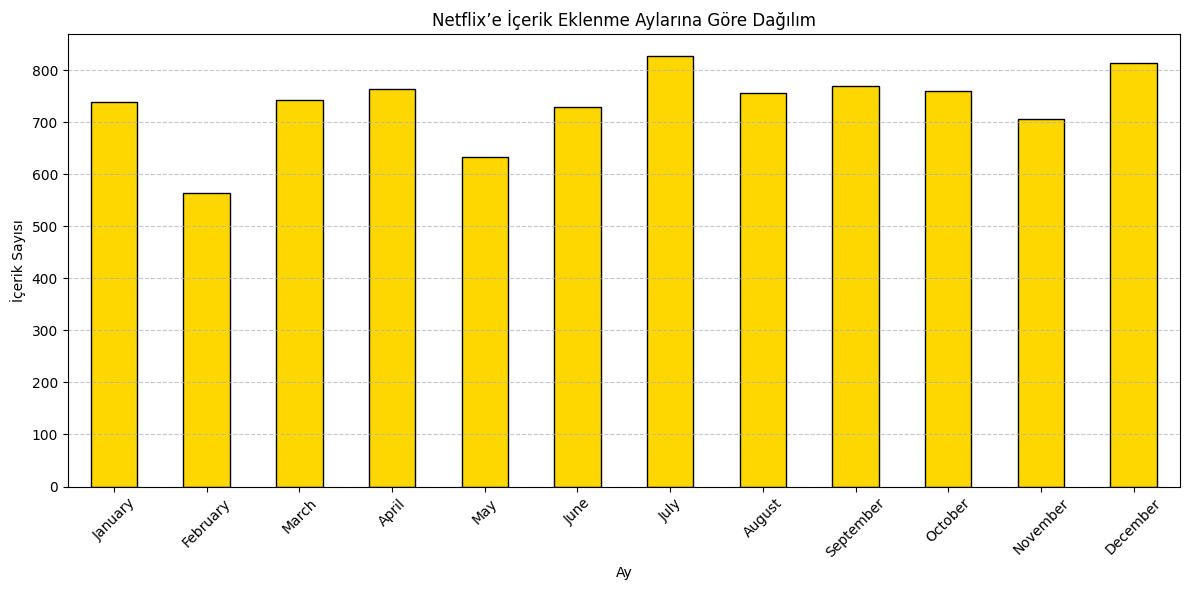

In [33]:
# Ay isimlerini çıkaralım
df['month_added'] = df['date_added'].dt.month_name()

# Ay sırasına göre gruplama
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

month_counts = df['month_added'].value_counts().reindex(month_order)

# Grafik çizme
plt.figure(figsize=(12,6))
month_counts.plot(kind='bar', color='#FFD700', edgecolor='black')
plt.title('Netflix’e İçerik Eklenme Aylarına Göre Dağılım')
plt.xlabel('Ay')
plt.ylabel('İçerik Sayısı')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Netflix tends to add more content during the **summer months (especially July) and the holiday season (December)** when user interest is typically higher.
This strategy likely aims to **maximize content consumption during users’ free time**.

### **14.1 Average Duration by Popular Movie Categories**

In [34]:
# Sadece filmleri al
movies = df[df['type'] == 'Movie'].copy()

# Süreyi sayı olarak çıkar
movies['duration_int'] = movies['duration'].str.extract('(\d+)').astype(float)

# Kategorileri patlat
movies['listed_in'] = movies['listed_in'].str.split(', ')
movies_exploded = movies.explode('listed_in')

# En popüler 10 kategori
top_categories = movies_exploded['listed_in'].value_counts().head(10).index

# Bu kategorilere ait ortalama süre
category_duration = movies_exploded[movies_exploded['listed_in'].isin(top_categories)] \
                    .groupby('listed_in')['duration_int'].mean().sort_values(ascending=False).round(1)


# Tablo olarak göster
display(category_duration.to_frame(name="Ortalama Süre (dk)"))

,Ortalama Süre (dk)
listed_in,
Action & Adventure,113.5
Dramas,113.1
Romantic Movies,110.6
International Movies,110.3
Thrillers,107.2
Music & Musicals,106.1
Comedies,103.9
Independent Movies,101.1
Documentaries,81.6


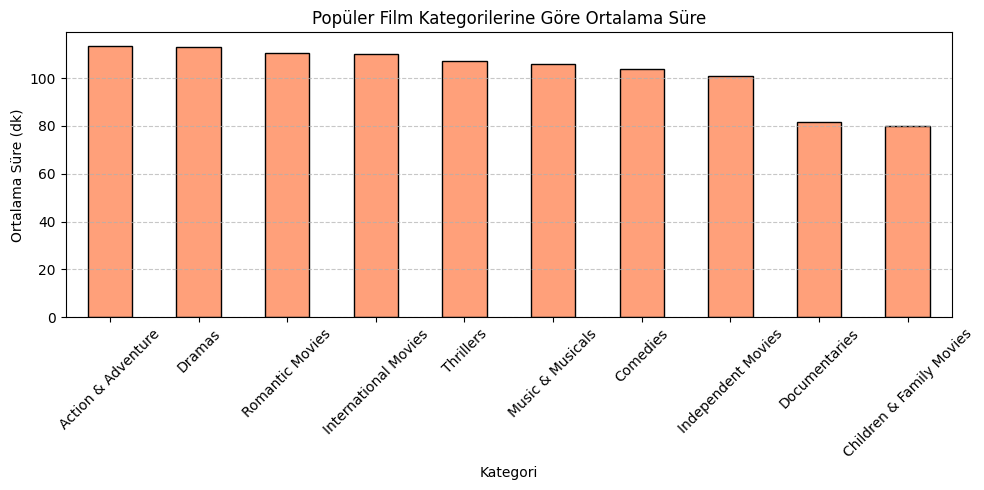

In [35]:
# Grafik çiz
plt.figure(figsize=(10,5))
category_duration.plot(kind='bar', color='#FFA07A', edgecolor='black')
plt.title('Popüler Film Kategorilerine Göre Ortalama Süre')
plt.xlabel('Kategori')
plt.ylabel('Ortalama Süre (dk)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Movies in genres such as **Action & Adventure, Dramas**, and **Romantic Movies** tend to have an average duration exceeding 110 minutes.
- In contrast, films in the **Children & Family Movies** and **Documentaries** categories are shorter, averaging around 80–85 minutes.

This analysis provides valuable insights into **viewer preferences based on content type**, and helps us better understand **Netflix’s strategy for delivering content with varying durations**.

### **14.2  Average Number of Seasons by Popular TV Show Categories**

,Kategori,Ortalama Sezon Sayısı
0,TV Comedies,2.151463
1,Kids' TV,1.977827
2,TV Dramas,1.850590
3,British TV Shows,1.818182
4,Crime TV Shows,1.708511
5,Anime Series,1.573864
6,Reality TV,1.552941
7,International TV Shows,1.410067
8,Romantic TV Shows,1.397297
9,Docuseries,1.336709


<Figure size 1000x500 with 0 Axes>

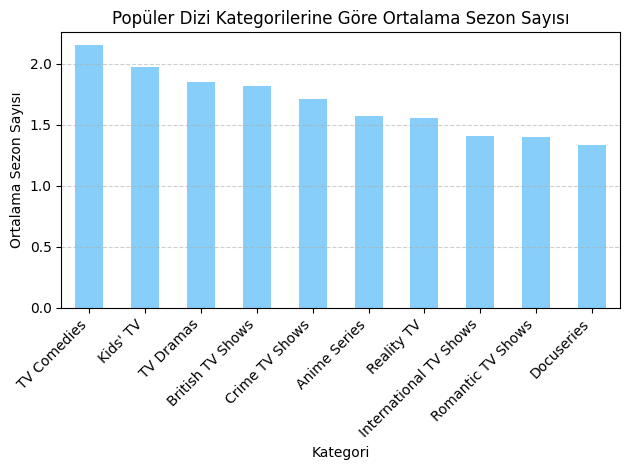

In [36]:
# listed_in sütununu patlat
shows_exploded = shows.copy()
shows_exploded['listed_in'] = shows_exploded['listed_in'].str.split(', ')
shows_exploded = shows_exploded.explode('listed_in')

# En popüler 10 kategori
top_categories = shows_exploded['listed_in'].value_counts().head(10).index

# Bu kategorilere ait veriler
top_shows = shows_exploded[shows_exploded['listed_in'].isin(top_categories)]

# Ortalama sezon sayısını DataFrame olarak al
avg_seasons_df = top_shows.groupby('listed_in')['duration_int'].mean().sort_values(ascending=False).reset_index()
avg_seasons_df.columns = ['Kategori', 'Ortalama Sezon Sayısı']

# 📊 Tabloyu göster
display(avg_seasons_df)

# Bar grafik
plt.figure(figsize=(10,5))
avg_seasons_df.plot(kind='bar', x='Kategori', y='Ortalama Sezon Sayısı', color='#87CEFA', legend=False)
plt.title('Popüler Dizi Kategorilerine Göre Ortalama Sezon Sayısı')
plt.xlabel('Kategori')
plt.ylabel('Ortalama Sezon Sayısı')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


This chart compares the **average number of seasons** for **the 10 most popular TV show categories** on Netflix:
- The TV Comedies category stands out as the most long-running type, with an average of **2.15 seasons**.
- Categories such as Docuseries, Romantic TV Shows, and International TV Shows have **lower average season counts**.

This distribution suggests that comedy and drama series tend to be more sustained over time, likely due to higher viewer interest and engagement compared to other genres.

### **15. Days with the Most Content Additions**

In [37]:
# Haftanın Gününü Almak İçin Yeni Sütun Oluştur
df['day_added'] = df['date_added'].dt.day_name()

In [38]:
# Günlere Göre Sayıları Say
day_counts = df['day_added'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

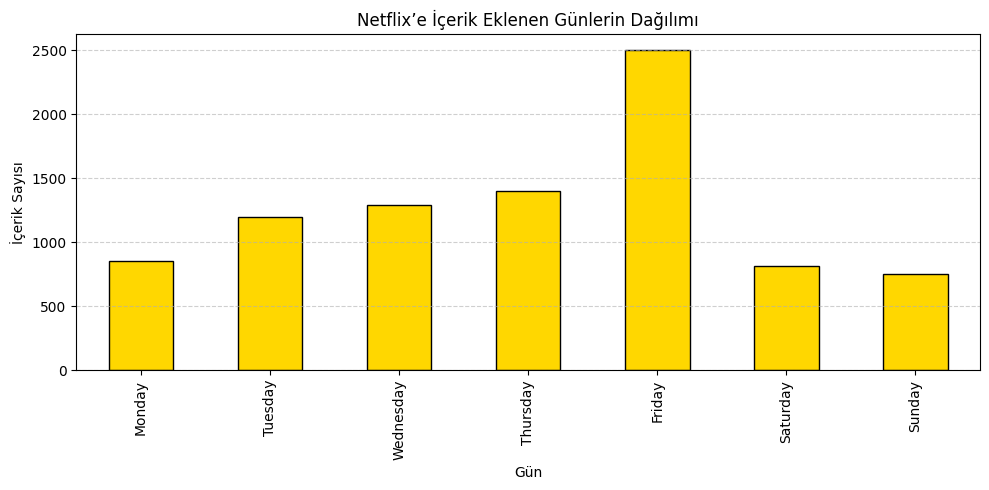

In [39]:
plt.figure(figsize=(10,5))
day_counts.plot(kind='bar', color='#FFD700', edgecolor='black')
plt.title('Netflix’e İçerik Eklenen Günlerin Dağılımı')
plt.xlabel('Gün')
plt.ylabel('İçerik Sayısı')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Friday is the day when the most content is added to Netflix.
This may be a strategic move to ensure that **users have access to fresh content before the weekend**.
Monday, on the other hand, is the weekday with the **lowest number of additions**.

It can be inferred that Netflix’s content release strategy is shaped around user behavior.
The heavy additions before weekends likely aim to **boost viewer traffic during leisure time**.

### **16. Content Addition Density by Month and Day**

In [40]:
# ay ve gün bilgilerini içeren sütunlar oluştur
df['month_added'] = df['date_added'].dt.month_name()
df['day_added'] = df['date_added'].dt.day_name()

In [41]:
# pivot tabloya dönüştür
heatmap_data = df.pivot_table(index='day_added', columns='month_added', aggfunc='size', fill_value=0)

In [42]:
# Gün ve ayları sıralamak için yeniden diz
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

heatmap_data = heatmap_data.reindex(index=days_order, columns=months_order)

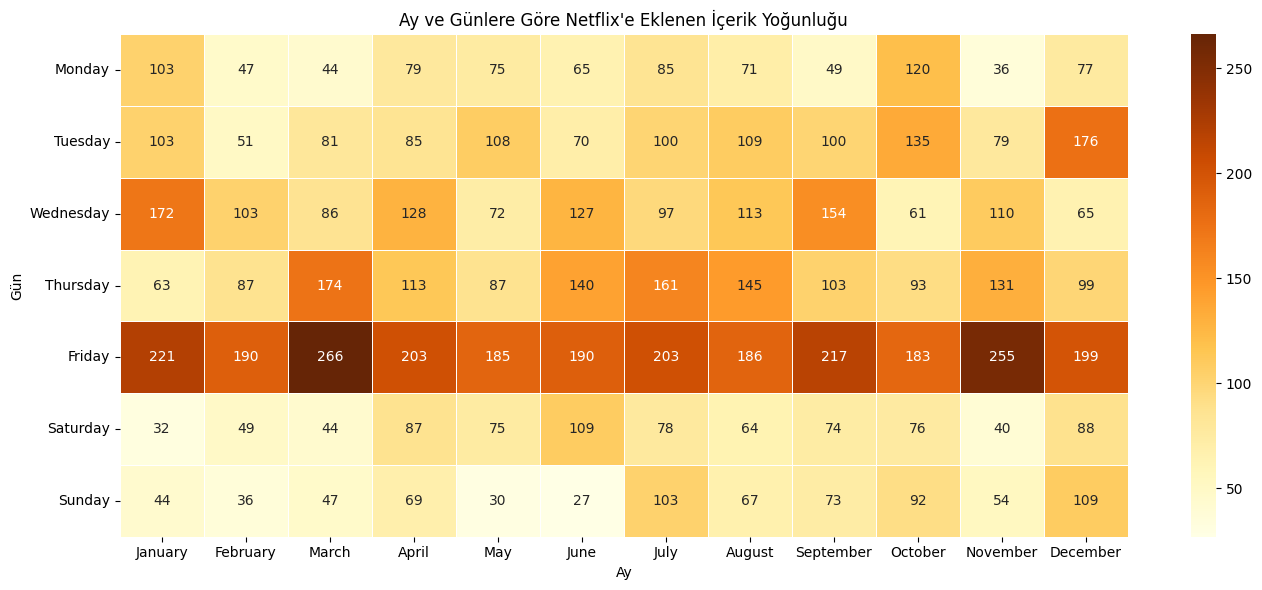

In [43]:
# Isı haritası çiz
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlOrBr", linewidths=0.5, annot=True, fmt="d")
plt.title("Ay ve Günlere Göre Netflix'e Eklenen İçerik Yoğunluğu")
plt.xlabel("Ay")
plt.ylabel("Gün")
plt.tight_layout()
plt.show()

According to this heatmap:
- **Friday** stands out as the day when the most content is added to Netflix. This may be a strategic move to ensure users have access to new titles ahead of the weekend.
- **Thursday** is more active than Wednesday, indicating that midweek content releases can also be an effective way to attract viewers.
- **January** and **July** appear to be the peak months for adding new content to the platform. These may align with holiday periods and represent strategic release windows.
- A noticeable increase is also seen in **December**, which may reflect Netflix’s strategy to **expand its content offering ahead of the holiday season** to meet rising user demand.



## **🎬 Conclusion & Final Thoughts**
In this notebook, we conducted a comprehensive Exploratory Data Analysis (EDA) on the Netflix dataset to uncover insights about the platform’s content trends, audience targeting strategies, and global distribution.

We examined various aspects, including content types, release trends over the years, country-wise distributions, audience ratings, genres, durations, and more. Through data cleaning, visualization, and interpretation, we gained a deeper understanding of Netflix’s strategic decisions and how its content aligns with user preferences.

## **📌  General Conclusions**
1. Approximately 70% of Netflix content consists of movies, while the remaining 30% are TV shows — indicating a movie-dominant strategy.
2. The number of added titles increased significantly after 2016, peaking in 2018 and 2019, reflecting Netflix’s global expansion.
3. When comparing movies and TV shows over time, movies consistently lead, though the number of TV shows has also grown steadily.
4. The United States produces the most content, followed by countries like India and the United Kingdom, showing Netflix’s international content strategy.
5. In the ratings analysis, TV-MA is the most common classification, suggesting a focus on adult audiences.
6. The most popular content genres include International Movies, Dramas, Comedies, and Documentaries.
7. When examining the relationship between rating and content type, we see that children's ratings are mostly associated with TV shows, while teen and adult ratings are dominant in movies.
8. Country-based comparisons show that the U.S. leads in both films and TV shows, India is film-heavy, while Japan and South Korea lean toward TV content.
9. Each country has a distinct content focus — Dramas in the U.S., International Movies in India, and British TV Shows in the U.K.
10. Movies typically last 90–100 minutes, while most TV shows are limited to a single season, highlighting Netflix’s short-form content strategy.
11. The word cloud analysis reveals emotional and character-driven themes like “family,” “life,” “love”, which are common in Netflix content.
12. Rajiv Chilaka, Raúl Campos & Jan Suter are among the most active directors, although many titles lack director information.
13. July and December are the months with the highest number of content additions, likely chosen for their high user activity.
14. Friday is the busiest day for content additions, aligning with weekend viewing trends.
15. The heatmap analysis confirms that January, July, and December, especially Fridays, are peak times for new content releases.
16. Duration analysis shows that action, drama, and romantic movies tend to be longer, while children’s and documentary content is shorter. In terms of TV shows, comedies have the longest average number of seasons.

This project not only enhanced my skills in data cleaning, manipulation, and visualization with Python, but also allowed me to derive real-world insights from a large-scale dataset.

----
## **🔮 Future Work**
While this notebook focused on descriptive and visual analysis, there are several exciting directions for future work:

- Content Recommendation Models: Using machine learning techniques (e.g., collaborative filtering, content-based filtering) to suggest titles based on viewer preferences.

- NLP-Based Genre Prediction: Applying Natural Language Processing (NLP) to predict content genres from descriptions or summaries.

- Clustering & Segmentation: Performing unsupervised learning (e.g., K-Means) to identify patterns among different types of content based on duration, genre, and rating.

---

🙏 Thank you for taking the time to explore this analysis.
If you found it useful, feel free to leave a comment or upvote — feedback is always appreciated!
Looking forward to building more data projects — stay tuned! 🚀